- Ïõπ ÌÅ¨Î°§ÎßÅ

In [20]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import time
import MeCab
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

mpl.rcParams['axes.unicode_minus'] = False #ÌïúÍ∏ÄÌè∞Ìä∏Î°ú Î∞îÍø®ÏùÑ Îïå ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ

In [2]:
driver = webdriver.Chrome('./chromedriver.exe')
driver.implicitly_wait(2)
driver.get("https://www.youtube.com/")

In [3]:
driver.find_element_by_xpath('//*[@id="contents"]/ytd-rich-item-renderer[2]').click()

In [6]:
last_page_height = driver.execute_script("return document.documentElement.scrollHeight")

while True: 
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") 
    time.sleep(1) 
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
    if new_page_height == last_page_height: 
        break 
    last_page_height = new_page_height 

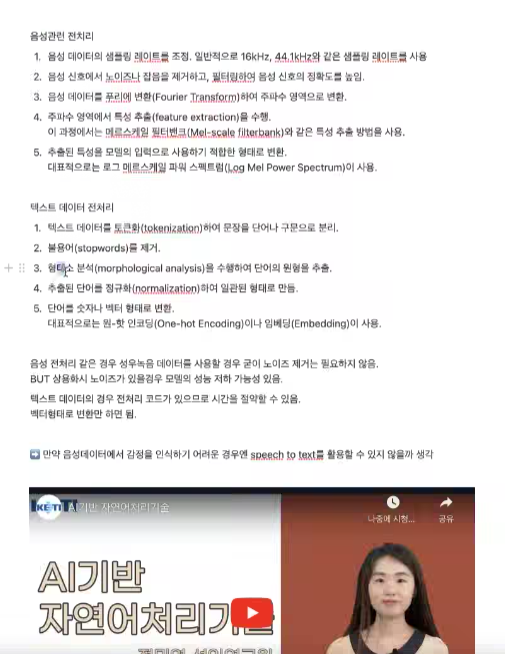

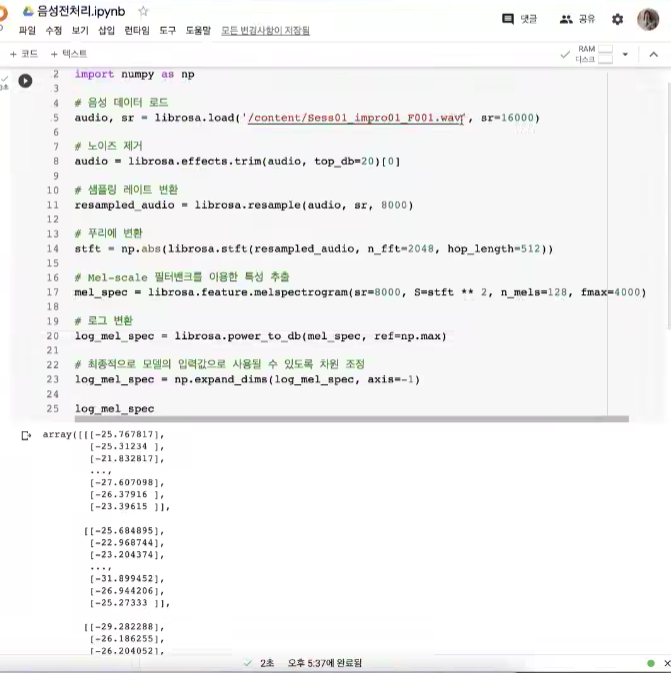

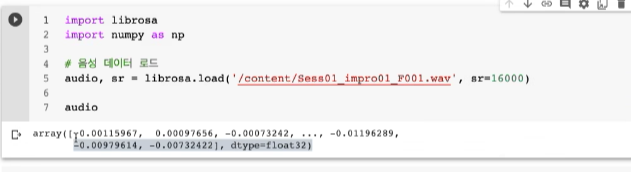

- Ïù¥Î†áÍ≤å ÎΩëÏïÑÎèÑ Î∞∞Ïó¥Î°ú ÎÇòÏò¥
- Ïö∞Î¶¨Îäî Ïù¥Í±∏ ÏùåÏÑ±ÏúºÎ°ú Îì£ÏßÄÎßå Ïª¥Ìì®ÌÑ∞Îäî ÏùåÏÑ±ÏúºÎ°ú Ïù∏Ïãù Î™ªÌï®
- Í∑∏Îüº Ïª¥Ìì®ÌÑ∞Í∞Ä ÏïåÏïÑÎì§ÏùÑ Ïàò ÏûàÍ≤å Î∂àÎü¨Ïò§Îäî Î∞©Î≤ïÏù¥ Ïñ¥Î†àÏù¥ÏûÑ
- Ïù¥ÏßÑÎ≤ï Ïù¥Îü∞ Í±∏Î°ú Î≥ÄÌôòÌïòÎäî Í≤ÉÏ≤òÎüº ÏùåÏÑ±ÏùÑ ÎÑòÌååÏù¥ Ïñ¥Î†àÏù¥Î°ú Ïù∏ÏãùÌï¥ÏÑú Í∞ÄÏ†∏Ïò§Îäî Í≤ÉÏûÑ
- Ï∞®Ïõê Ï°∞Ï†ïÎèÑ Î™®Îç∏ÏóêÏÑú Ï∞®ÏõêÏù¥ ÎßéÏùÑÏàòÎ°ù Îî•Îü¨ÎãùÏùÄ ÏïÑÎãê ÌÖêÎç∞ Î®∏Ïã†Îü¨Îãù Í∞ôÏùÄ Í≤ΩÏö∞Ïóî Ïù∏ÏãùÏùÑ Ïûò Î™ªÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏùå Ï∞®Ïõê Í¥ÄÎ†®ÏùÄ Í≥µÎ∂ÄÌï¥ Î≥¥ÏãúÎäî Í≤å Ï¢ãÏïÑÏöî


- ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [7]:
comments=[]
page = driver.page_source
soup = bs(page, 'lxml')
all_comments = soup.find_all(id='expander')
for comment in all_comments:
    try:
        comment_oneline = comment.find(id='content-text').text
        comments.append(comment_oneline)
    except:
        comment_lines = comment.find_all('span', {'class':"style-scope yt-formatted-string"})
        comment = ''
        for line in comment_lines:
            comment += line.text.strip() + ' '
        if len(comment) > 0:
            comments.append(comment)
#<yt-formatted-string id="content-text" slot="content" split-lines="" class="style-scope ytd-comment-renderer">
#<yt-formatted-string id="content-text" slot="content" split-lines="" class="style-scope ytd-comment-renderer">Ï†úÎ™© Î∞îÍøßÎÑ§ „Öã„Öã„Öã</yt-formatted-string>

In [8]:
print(len(comments), comments)

345 ['ÏïàÎÖïÌïòÏÑ∏Ïöî ÏàòÌîÑ Ï±ÑÎÑê Ïï†Ï≤≠Ïûê, Íµ¨ÎèÖÏûê Ïó¨Îü¨Î∂Ñ!\r\n\rÎü∞ÎçòÏóêÏÑú ÎÖπÏùåÌï¥ Ïò® ÏÜåÎ¶¨ Îëê Î≤àÏß∏Îäî\n\nÏòÅÍµ≠ ÎèÑÏÑúÍ¥ÄÏùò ÏûÖÏ≤¥ ÏùåÌñ•ÏûÖÎãàÎã§.\r\n \nÏó¥ÎûåÏã§ ÏÜåÎ¶¨ÎèÑ ÎÖπÏùåÌïòÍ≥† Ïã∂ÏóàÎäîÎç∞ \r\nÏó¥ÎûåÏã§Ïóê ÎßàÏù¥ÌÅ¨ Í∞ôÏùÄ\r\nÏ†ÑÏûê Í∏∞Í∏∞ Î∞òÏûÖÏù¥ ÏïàÎêúÎã§Í≥† ÌïòÎçîÎùºÍ≥†Ïöî.\r\nÏÑúÍ∞Ä Ï∂úÏûÖÏ¶ù Î∞úÍ∏â Î∞õÏúºÎ†§Í≥† Ïó¨Í∏∞Ï†ÄÍ∏∞ ÏïåÏïÑÎ≥¥Í≥†\r\nÏÑúÎ•òÎèÑ Ï§ÄÎπÑÌñàÎäîÎç∞ ÏÜåÏö©Ïù¥ ÏóÜÏóàÎÑ§Ïöî.„Ö†\r\n \nÌïòÏßÄÎßå ÏßëÏ§ëÎ†•ÏóêÎäî Ï†ÅÎãπÌïú ÏÜåÏùåÏù¥ ÎèÑÏõÄÏù¥ ÎêòÍ≥†\r\nÏ°∞Ïö©Ìïú Ïó¥ÎûåÏã§ Î≥¥Îã§Îäî\r\nÏù¥Ï™ΩÏù¥ Í≥µÎ∂ÄÌï† Îïê Îçî ÎÇ´Îã§Îäî ÏÉùÍ∞ÅÏù¥ Îì§Ïñ¥Ïöî.\r\n \nÏòÅÍµ≠ ÎèÑÏÑúÍ¥Ä Î°úÎπÑÏôÄ Ïπ¥ÌéòÌÖåÎ¶¨ÏïÑÏóêÎäî\r\nÍ≥ºÏ†úÎ•º ÌïòÍ±∞ÎÇò Í≥µÎ∂ÄÎ•º ÌïòÎäî ÏÇ¨ÎûåÎì§Ïù¥ Ï†ïÎßê ÎßéÏïÑÏöî.\r\nÏ†ÄÎèÑ ÎÖπÏùåÌïòÎäî ÎèôÏïà Ï±ÖÏùÑ Ïó¥Ïã¨Ìûà ÏùΩÏùÑ Ïàò ÏûàÏóàÎãµÎãàÎã§.\r\n \nÌÖåÏä§Ìä∏Î°ú Îì§Ïñ¥ Î≥¥Îãà ÏßëÏ§ëÎèÑ Ïûò ÎêòÍ≥† ÏãúÍ∞ÑÎèÑ Ï†ïÎßê Ïûò Í∞ÄÎÑ§Ïöî.\r\nÍ≥µÎ∂ÄÌï† Îïå ÎøêÎßåÏïÑÎãàÎùº ÏûëÏóÖÌï† ÎïåÎèÑ,\r\nÏ±ÖÏùÑ ÏùΩÏùÑ ÎïåÎèÑ Ï†ïÎßê Ï¢ãÏùÄ ÏÜåÎ¶¨ÎùºÍ≥† ÏÉùÍ∞ÅÌï¥Ïöî.\

In [9]:
def getNVM_lemma(text):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(text)
    word_tag = [w for w in parsed.split("\n")]
    pos = []
    tags = ['NNG', 'NNP', 'VV', 'VA', 'VX', 'VCP', 'VCN', 'MAG']
    for word_ in word_tag[:-2]:
        word = word_.split("\t")
        tag = word[1].split(",")
        if(tag[0] in tags):
            pos.append(word[0])
        elif('+' in tag[0]): #Îã®Ïñ¥Í∞Ä Ïó¨Îü¨ ÌòïÌÉúÏÜåÎ°ú Íµ¨ÏÑ±Îêú Í≤ΩÏö∞
            if('VV' in tag[0] or 'VA' in tag[0] or 'VX' in tag[0]):
                t = tag[-1].split('/')[0]
                pos.append(t)
    return pos

def main():
    s = 'Ïö∞Î¶¨Îäî Í∞ÄÍπåÏõåÏßà Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Í∞ÄÍπùÍ≤å ÎäêÍª¥ÏßÄÏßÄ ÏïäÎäîÎã§'
    print(getNVM_lemma(s))
    
main()

['Í∞ÄÍπù', 'ÏóÜ', 'Í∞ÄÍπù', 'ÎäêÎÅº', 'ÏßÄ', 'Ïïä']


In [10]:
# ÌÖçÏä§Ìä∏Î•º Ïó¨Í∏∞Ïóê forÎ¨∏ ÎèåÎ¶¨Î©¥ ÎêúÎã§.
morphemes = []
for comment in comments:
    comment_morph = getNVM_lemma(comment)
    print(comment_morph)
    morphemes += comment_morph

['ÏïàÎÖï', 'ÏàòÌîÑ', 'Ï±ÑÎÑê', 'Ïï†Ï≤≠Ïûê', 'Íµ¨ÎèÖÏûê', 'Îü∞Îçò', 'ÎÖπÏùå', 'Ïò§', 'ÏÜåÎ¶¨', 'ÏòÅÍµ≠', 'ÎèÑÏÑúÍ¥Ä', 'ÏûÖÏ≤¥', 'ÏùåÌñ•', 'Ïó¥ÎûåÏã§', 'ÏÜåÎ¶¨', 'ÎÖπÏùå', 'Ïã∂', 'Ïó¥ÎûåÏã§', 'ÎßàÏù¥ÌÅ¨', 'Í∞ô', 'Ï†ÑÏûê', 'Í∏∞Í∏∞', 'Î∞òÏûÖ', 'Ïïà', 'Îêò', 'Ìïò', 'ÏÑúÍ∞Ä', 'Ï∂úÏûÖÏ¶ù', 'Î∞úÍ∏â', 'Î∞õ', 'Ïó¨Í∏∞Ï†ÄÍ∏∞', 'ÏïåÏïÑÎ≥¥', 'ÏÑúÎ•ò', 'Ï§ÄÎπÑ', 'ÏÜåÏö©', 'ÏóÜ', 'Ìïò', 'ÏßëÏ§ëÎ†•', 'ÏÜåÏùå', 'ÎèÑÏõÄ', 'Îêò', 'Ïó¥ÎûåÏã§', 'Í≥µÎ∂Ä', 'Îçî', 'ÎÇ´', 'ÏÉùÍ∞Å', 'Îì§', 'ÏòÅÍµ≠', 'ÎèÑÏÑúÍ¥Ä', 'Î°úÎπÑ', 'Ïπ¥ÌéòÌÖåÎ¶¨ÏïÑ', 'Í≥ºÏ†ú', 'Ìïò', 'Í≥µÎ∂Ä', 'Ìïò', 'ÏÇ¨Îûå', 'Ï†ïÎßê', 'Îßé', 'ÎÖπÏùå', 'ÎèôÏïà', 'Ï±Ö', 'Ïó¥Ïã¨Ìûà', 'ÏùΩ', 'Ïûà', 'ÌÖåÏä§Ìä∏', 'Îì§', 'Î≥¥', 'ÏßëÏ§ë', 'Ïûò', 'Îêò', 'ÏãúÍ∞Ñ', 'Ï†ïÎßê', 'Ïûò', 'Í∞Ä', 'Í≥µÎ∂Ä', 'Îïå', 'ÏïÑÎãà', 'ÏûëÏóÖ', 'Îïå', 'Ï±Ö', 'ÏùΩ', 'Îïå', 'Ï†ïÎßê', 'Ï¢ã', 'ÏÜåÎ¶¨', 'ÏÉùÍ∞Å', 'ÏöîÏ¶ò', 'Í∏∞ÎßêÍ≥†ÏÇ¨', 'Í∏∞Í∞Ñ', 'Ïù¥', 'Îì§', 'Î∂ÄÎîî', 'ÎèÑÏõÄ', 'Îêò', 'Ìïò', 'ÌõÑÏõê', 'Ï£º', 'Ìòú', 'Ïàò', 'Î£®Ïãú', 'Ìö®Ï†ï', 'Ïú†ÎØº', 'ÏßÑÏã¨', 'Í∞êÏÇ¨', 'ÎìúÎ¶¨', 'Ìö

In [11]:
morpheme_nums = {}
for i in morphemes:
    if i in morpheme_nums:
        morpheme_nums[i] += 1
    else:
        morpheme_nums.update({i:1})
morph_sorted = sorted(morpheme_nums.items(), key=(lambda x:x[1]), reverse = True)
print(morph_sorted, type(morph_sorted))

[('Í≥µÎ∂Ä', 151), ('Ìïò', 129), ('Í∞êÏÇ¨', 125), ('Ïûà', 111), ('Îì£', 106), ('ÏàòÌîÑ', 103), ('Ï¢ã', 94), ('Îêò', 86), ('Ïûò', 83), ('ÏÜåÎ¶¨', 82), ('Ïù¥', 77), ('ÎèÑÏÑúÍ¥Ä', 69), ('ÎÑàÎ¨¥', 65), ('Î≥¥', 61), ('Ï£º', 61), ('ÏòÅÏÉÅ', 60), ('ÏßÑÏßú', 58), ('ÏßëÏ§ë', 57), ('Í∞ô', 55), ('ÏòÅÍµ≠', 51), ('Í∞Ä', 48), ('Îïå', 40), ('ÏãúÌóò', 37), ('Ìï≠ÏÉÅ', 35), ('Ï†ïÎßê', 32), ('Ïò§', 30), ('Ïïà', 30), ('„Ñ∑', 30), ('Îì§', 29), ('Ïïå', 27), ('Îì§Î¶¨', 26), ('ÎçïÎ∂Ñ', 24), ('ÏÜåÏùå', 23), ('Ïò§Îäò', 21), ('Í∏∞Í∞Ñ', 20), ('Îßê', 19), ('ÏßÄÍ∏à', 19), ('Ïó¥Ïã¨Ìûà', 17), ('ÏãúÍ∞Ñ', 17), ('Î¶¨Ïñº', 17), ('ÏóÜ', 16), ('Îçî', 16), ('ÏÇ¨Îûå', 16), ('ÏòÜ', 16), ('Ïßë', 16), ('Îü∞Îçò', 15), ('ÎßéÏù¥', 15), ('ÎäêÎÇå', 13), ('Ïπ¥Ìéò', 13), ('ÎìúÎ¶¨', 12), ('ÌÅ¨', 12), ('Ïïä', 12), ('Í∏∞Î∂Ñ', 12), ('Ïò¨Î¶¨', 12), ('ÏÇ¨Îûë', 12), ('Îäò', 12), ('Ïã∂', 11), ('ÏµúÍ≥†', 11), ('Î™ª', 11), ('Îî±', 11), ('ÏòÅÏñ¥', 11), ('Í≥ÑÏÜç', 11), ('Ïù¥Î†áÍ≤å', 11), ('ÎÑò', 11), ('ÏÉùÍ∞Å', 10), ('ÎåÄÎ∞ï', 10), ('Ïôú', 10), ('

['NanumSquare_ac']


<BarContainer object of 25 artists>

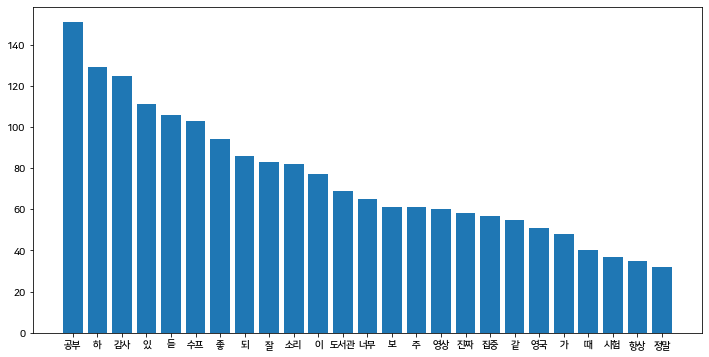

In [13]:
top20_keys = list(itertools.islice(morph_sorted, 25))
#morph_top20 = {i: morph_sorted[i] for i in top20_keys}
morph_top20 = dict(top20_keys)

plt.rc('font', family='NanumSquare_ac') # For Windows
print(plt.rcParams['font.family'])

fig = plt.figure(figsize = (12,6))

ax = fig.add_subplot(111)

ax.bar(*zip(*morph_top20.items()))

In [14]:
top20_keys

[('Í≥µÎ∂Ä', 151),
 ('Ìïò', 129),
 ('Í∞êÏÇ¨', 125),
 ('Ïûà', 111),
 ('Îì£', 106),
 ('ÏàòÌîÑ', 103),
 ('Ï¢ã', 94),
 ('Îêò', 86),
 ('Ïûò', 83),
 ('ÏÜåÎ¶¨', 82),
 ('Ïù¥', 77),
 ('ÎèÑÏÑúÍ¥Ä', 69),
 ('ÎÑàÎ¨¥', 65),
 ('Î≥¥', 61),
 ('Ï£º', 61),
 ('ÏòÅÏÉÅ', 60),
 ('ÏßÑÏßú', 58),
 ('ÏßëÏ§ë', 57),
 ('Í∞ô', 55),
 ('ÏòÅÍµ≠', 51),
 ('Í∞Ä', 48),
 ('Îïå', 40),
 ('ÏãúÌóò', 37),
 ('Ìï≠ÏÉÅ', 35),
 ('Ï†ïÎßê', 32)]

In [21]:
docs = pd.DataFrame(comments)
print(docs)

                                                     0
0    ÏïàÎÖïÌïòÏÑ∏Ïöî ÏàòÌîÑ Ï±ÑÎÑê Ïï†Ï≤≠Ïûê, Íµ¨ÎèÖÏûê Ïó¨Îü¨Î∂Ñ!\r\n\rÎü∞ÎçòÏóêÏÑú ÎÖπÏùåÌï¥ Ïò® ÏÜåÎ¶¨ Îëê...
1                               ÎèÑÏÑúÍ¥ÄÏóêÏÑú ÎèÑÏÑúÍ¥Ä Î∞±ÏÉâÏÜåÏùåÏùÑ Îì£Îäî ÎÇò..
2    ÎåÄÎ∞ï ÏàòÌîÑÎãò ÎçïÎ∂ÑÏóê Ïò§ÎäòÎèÑ ÏÉÅÏÉÅÌïòÎ©¥ÏÑú Í≥µÎ∂ÄÌï©ÎãàÎã§...ÎÇòÎäî ÏòÅÍµ≠Ïùò ÎòëÎòëÌïú ÎåÄÌïôÏÉùÏù¥Îã§....
3    ÏôÄ ÏßÅÏ†ë ÏòÅÍµ≠Ïóê Í∞ÄÎäî ÌÅ¥ÎùºÏä§,,„Ñ∑ „Ñ∑ ;;\nÏßÑÏßú ÎÑòÏÇ¨Î≤Ω\nÏôÑÏ†Ñ ÏÜåÎ¶¨ÎèÑÏ¢ãÍ≥† Îπ†Ï†∏Îì§Ïñ¥...
4    ÏóÑÎßà,,, ÎÇò ÏòÅÍµ≠Ïó¨Ìñâ Í≥µÏßúÎ°ú ÌïòÍ≥†ÏûàÏñ¥,,,Í±îÏ©îÏñ¥,,,Ïù¥Ï†† Î¨¥ÏÑúÏö∏ÏßÄÍ≤Ω......ÎÇ¥Í∞Ä...
..                                                 ...
340                       https://youtu.be/C9qLwYTyzr8
341  Ïä§ÌÑ∞ÎîîÏπ¥ÌéòÏóêÏÑú Ïù¥Í±∞ ÌãÄÏñ¥ÎÜìÏùÄÍ±∞ ÍπúÎπ°ÌïòÍ≥† Í≥µÎ∂ÄÌïòÎã§Í∞Ä Ïñ¥Îñ§ÏÇ¨ÎûåÏù¥ ÌÅ∞ÏÜåÎ¶¨Î°ú Ï†ÑÌôîÏòÅÏñ¥ÌïòÎäîÏ§Ñ...
342  ÎÇ¥Ïùº ÏàòÌñâÌèâÍ∞ÄÎ•º 2Í∞úÎÇò Ï≥êÏÑú ÎßâÎßâÌñàÎäîÎç∞ ÎïåÎßûÏ∂∞ Ïò¨Î†§Ï£ºÏãúÎÑ§Ïöî„Ö†„Ö† ÎãπÏã†ÏùÄ ÎèÑÎåÄÏ≤¥... ...
343  Ïó¨ÌÉú Îì§ÏóàÎçò asmrÏ§ëÏóê Ï†úÏù

In [23]:
tf_vect = CountVectorizer(tokenizer=getNVM_lemma, ngram_range=(2,2), min_df=2)
dtm = tf_vect.fit_transform(docs[0])


In [24]:
vocab = dict()
for idx, word in enumerate(tf_vect.get_feature_names()):
    vocab[word] = dtm.getcol(idx).sum()
words = sorted(vocab.items(), key = lambda x:x[1], reverse = True)

['NanumSquare_ac']


C:\Users\SYKim\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


<BarContainer object of 25 artists>

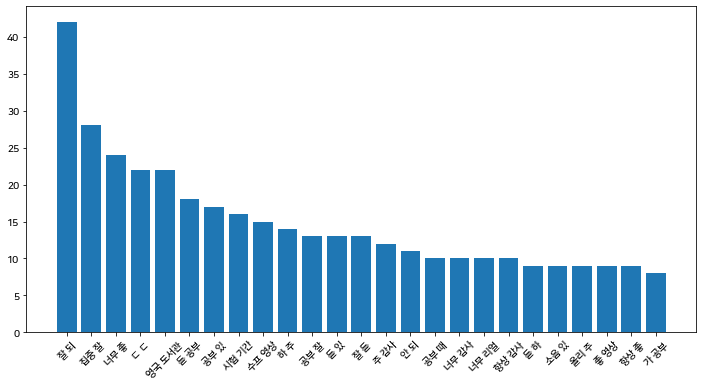

In [30]:
top25_keys = list(itertools.islice(words, 25))
#morph_top20 = {i: morph_sorted[i] for i in top20_keys}
morph_top25 = dict(top25_keys)

plt.rc('font', family='NanumSquare_ac') # For Windows
print(plt.rcParams['font.family'])

fig = plt.figure(figsize = (12,6))
plt.xticks(rotation=45)

ax = fig.add_subplot(111)

ax.bar(*zip(*morph_top25.items()))

- Ï†ÑÏ≤¥ ÌååÏùº Î∞òÎ≥µÌïòÎäî Î∞©Î≤ï
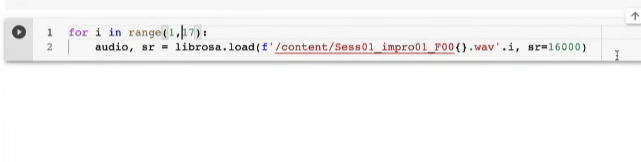

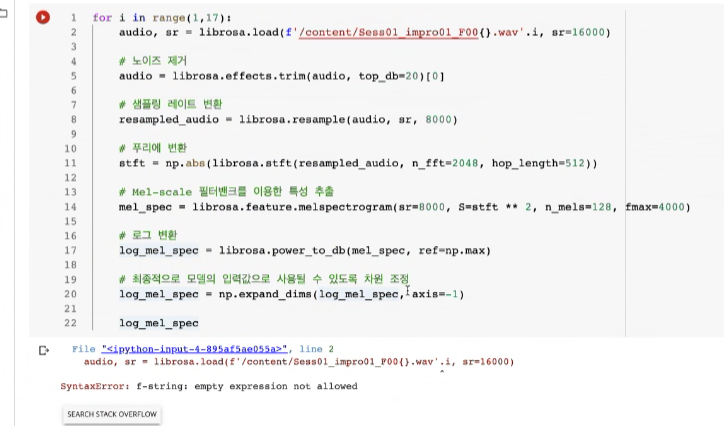
Ïù¥Î†áÍ≤å ÌïòÍ≥† dfÎ°ú Ï†ÄÏû•ÌïòÎ©¥ Î¨∏ÏÑúÌôîÍ∞Ä ÎêòÍ≤†Ï£†